INSTALLING THE NECESSARY LIBRARIES

In [1]:
# %pip install --upgrade nbformat
# %pip install yfinance
# %pip install pandas_datareader

# %pip install datetime

IMPORT THE NECESSARY LIBRARIES


In [2]:
import yfinance as yf
import datetime
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CREATING DATASET USING YFINANCE BETWEEN SPECIFIED DATE FOR SPECIFIED COMPANIES

In [3]:
startdate = datetime.date(1950,1,28)
today = date.today().isoformat()
print(startdate)
print(today)

1950-01-28
2024-06-04


In [4]:
df = yf.download('AMZN', start=startdate, end=today)
df = pd.concat([df], axis=0)
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [5]:
df.to_csv("BOOOK.csv", index=True)

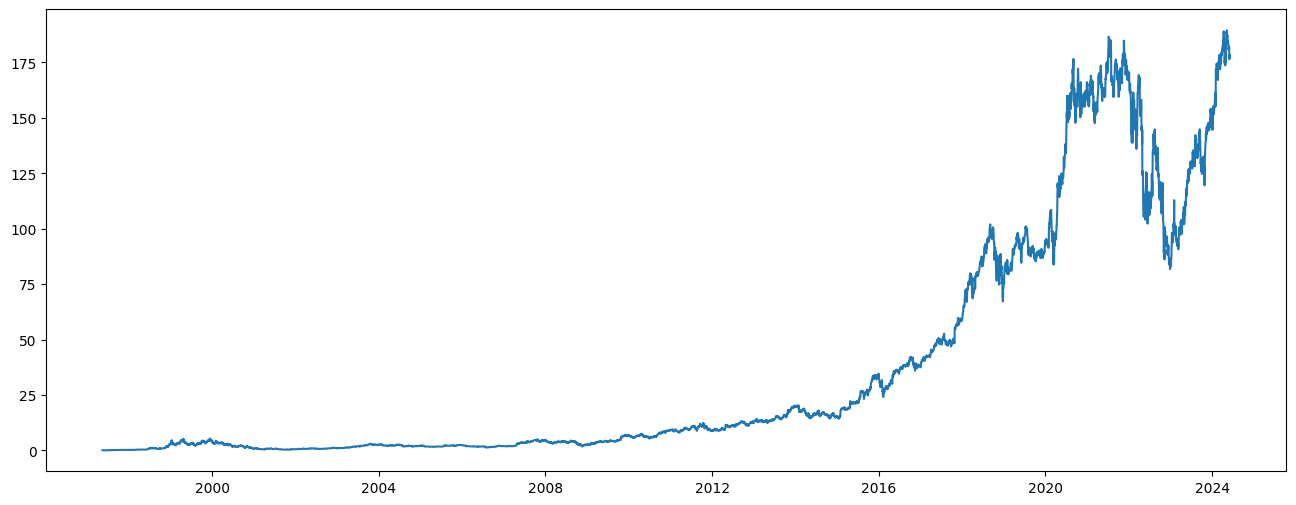

In [6]:
plt.figure(figsize=(16,6))
plt.plot(df['Adj Close'])
plt.show()

In [7]:
amazon_df = df

SPLITING THE OBTAINED DATASET INTO TEST AND TRAIN DATA

In [8]:
data = amazon_df.filter(['Adj Close'])
dataset = data.values
train = int(np.ceil( len(dataset) * .95 ))
train


6467

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[1.48471544e-04],
       [8.79796063e-05],
       [8.24842044e-05],
       ...,
       [9.46259930e-01],
       [9.31056415e-01],
       [9.41086463e-01]])

In [10]:
train_data = scaled_data[0:int(train), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([1.48471544e-04, 8.79796063e-05, 8.24842044e-05, 6.32370038e-05,
       8.24577736e-06, 0.00000000e+00, 2.74929780e-05, 4.94905148e-05,
       3.57440258e-05, 2.88654912e-05, 2.74929780e-05, 3.02433142e-05,
       2.19922664e-05, 5.49540188e-06, 3.84890915e-05, 6.87377154e-05,
       7.69834928e-05, 4.94905148e-05, 3.84890915e-05, 5.49859560e-05,
       4.94905148e-05, 4.67401393e-05, 2.88654912e-05, 3.02433142e-05,
       3.02433142e-05, 3.43662028e-05, 2.74929780e-05, 3.02433142e-05,
       3.02433142e-05, 3.02433142e-05, 2.47426025e-05, 3.84890915e-05,
       3.16158667e-05, 5.08630280e-05, 1.36097608e-04, 1.59467697e-04,
       2.39201526e-04, 2.44702238e-04, 3.07939242e-04, 2.36451190e-04,
       1.95211723e-04, 2.74945591e-04, 2.47452613e-04, 2.17209260e-04,
       2.00712435e-04, 2.07585659e-04, 1.95211723e-04, 2.36451190e-04,
       2.28205413e-04, 2.19954365e-04, 2.44702238e-04, 2.85941705e-04,
       2.77695927e-04, 2.63949438e-04, 2.69444880e-04, 2.41951902e-04,
     

MODEL ARCHITECHURE AND TRAINING THE DATA

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=2)





Epoch 1/2

6407/6407 [==============================] - 85s 13ms/step - loss: 8.9362e-04
Epoch 2/2
6407/6407 [==============================] - 82s 13ms/step - loss: 3.2397e-04


In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


MODEL EVALUATION

In [18]:
test_data = scaled_data[train - 60: , :]
x_test = []
y_test = dataset[train:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


11/11 [==============================] - 0s 21ms/step


In [19]:
predictions

array([[ 97.21808 ],
       [ 98.813835],
       [101.304306],
       [100.81783 ],
       [102.45786 ],
       [104.32514 ],
       [110.06783 ],
       [105.05252 ],
       [103.0447  ],
       [102.782524],
       [101.49275 ],
       [100.027695],
       [ 99.30686 ],
       [100.46578 ],
       [100.865326],
       [101.89802 ],
       [100.11667 ],
       [ 99.024   ],
       [ 97.049805],
       [ 97.37379 ],
       [ 97.471   ],
       [ 95.86925 ],
       [ 95.575485],
       [ 95.79798 ],
       [ 94.427765],
       [ 93.99108 ],
       [ 95.70316 ],
       [ 95.31213 ],
       [ 94.97666 ],
       [ 95.10832 ],
       [ 94.005936],
       [ 92.684265],
       [ 93.47864 ],
       [ 95.3043  ],
       [ 96.57389 ],
       [ 99.37962 ],
       [ 99.31011 ],
       [ 98.424706],
       [100.20969 ],
       [ 99.44716 ],
       [ 99.269035],
       [ 98.90432 ],
       [ 98.8041  ],
       [ 98.29188 ],
       [100.21507 ],
       [101.899124],
       [103.153564],
       [102.8

In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error
y_true = dataset[train:, 0] 
rmse = np.sqrt(mean_squared_error(y_true, predictions))
print("Root Mean Squared Error (RMSE):", rmse)



Root Mean Squared Error (RMSE): 2.8070630266919165


PREDICTIONS DISPLAYED IN FORM OF GRAPH

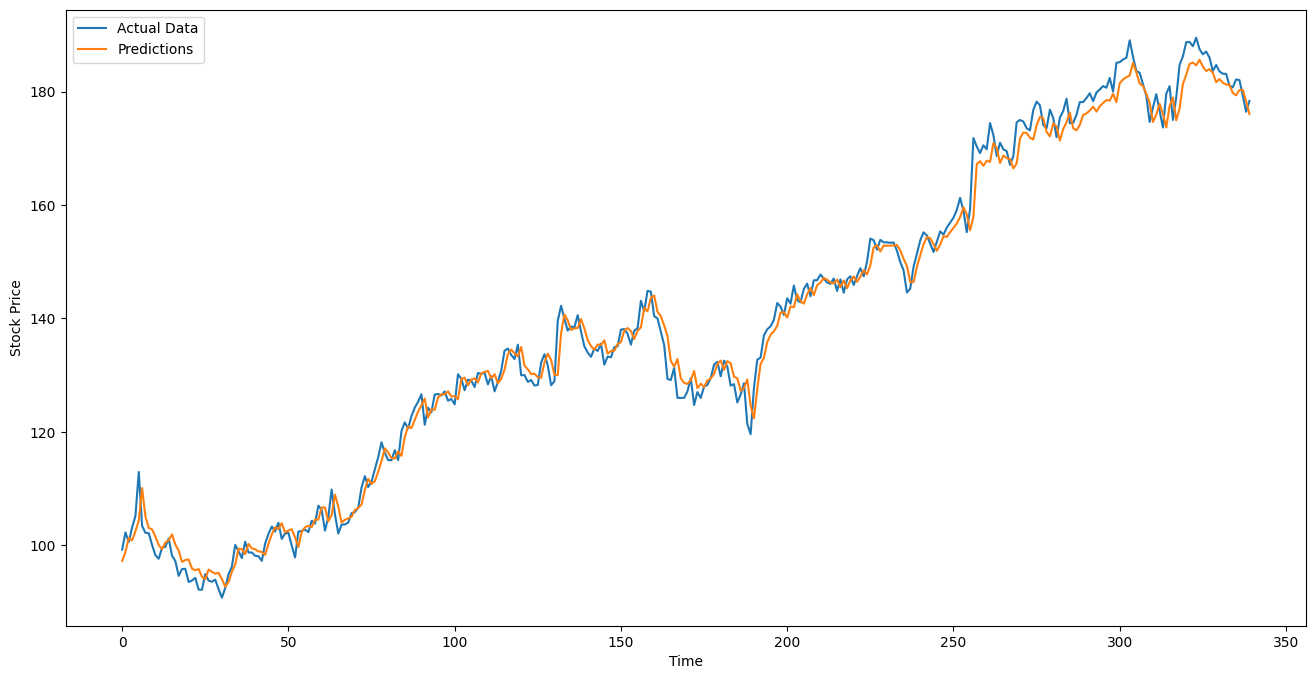

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(dataset[train:, :], label='Actual Data')

plt.plot(predictions, label='Predictions')

plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
